# Titanic-Survival-Prediction-Using-Supervised-Learning-Models

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

## 1. Preprocessing

In [8]:
# Load the train dataset 
path = '//Users/yerdenovagulnaz/Downloads/titanic/train.csv'
df_train = pd.read_csv(path) 

# Load the test dataset 
path = '//Users/yerdenovagulnaz/Downloads/titanic/test.csv'
df_test_org = pd.read_csv(path) 
df_test = df_test_org.copy()

### a.

In [286]:
# Display basic information about the train dataset 

print(df_train.info())
print(df_train.columns.tolist())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [287]:
# Display basic information about the test dataset 

print(df_test.info())
print(df_test.columns.tolist())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### b. 

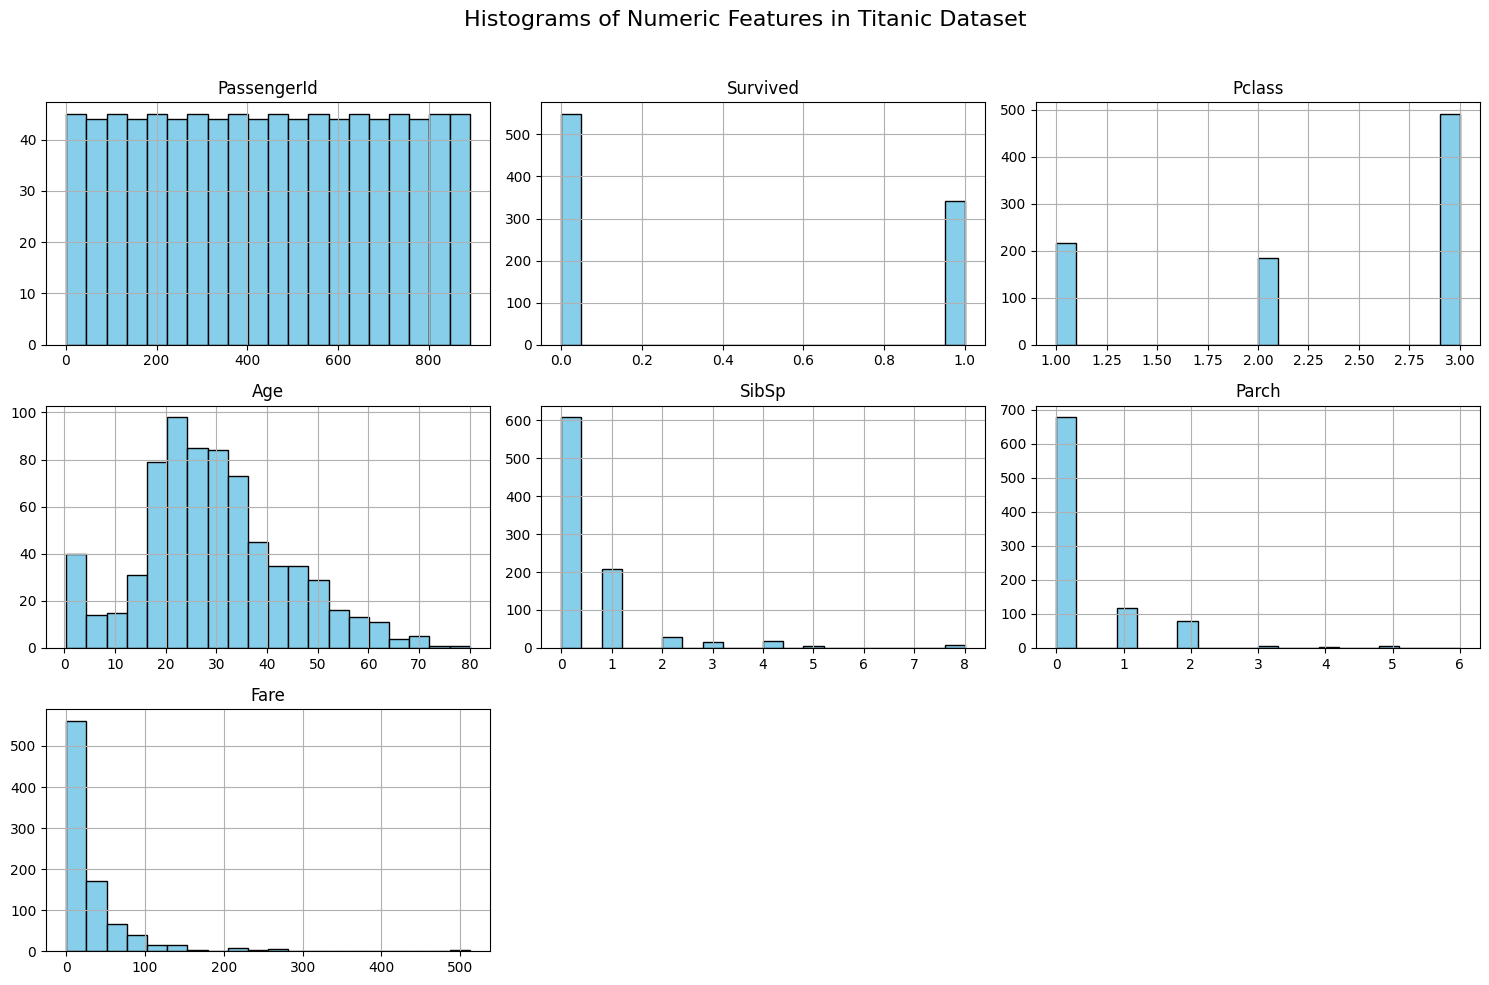

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [9]:
num_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms
df_train[num_features].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features in Titanic Dataset', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

corr_matrix = df_train[num_features].corr()
print(corr_matrix)


#### Candidate fearures 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.

### c. 

In [4]:
print(df_train['SibSp'].value_counts())
df_train['Parch'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
# Create a copy of the original DataFrame
df_train_copy = df_train.copy()

# Ensure 'Cabin' and 'Pclass' are not NaN before processing
df_train_copy = df_train_copy[df_train_copy['Cabin'].notna() & df_train_copy['Pclass'].notna()]


# Create 'Cabin_First_Letter' column from 'Cabin' column
df_train_copy['Cabin_First_Letter'] = df_train_copy['Cabin'].apply(lambda x: x[0])

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Cabin_First_Letter' column
df_train_copy['Cabin_First_Letter'] = label_encoder.fit_transform(df_train_copy['Cabin_First_Letter'])

# Calculate correlation between 'Cabin_First_Letter' and 'Pclass'
corr = df_train_copy['Cabin_First_Letter'].corr(df_train_copy['Pclass'])
print(f"Correlation between Cabin_First_Letter and Pclass: {corr}")


Correlation between Cabin_First_Letter and Pclass: 0.5982108823069516


I will drop Cabin and Ticket

### d.

In [11]:
# Initialize IterativeImputer with a model 
imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit and transform the 'Age' column in training data
df_train['Age'] = imputer.fit_transform(df_train[['Age']])

# Transform the 'Age' column in test data (using the fitted imputer)
df_test['Age'] = imputer.transform(df_test[['Age']])

# Check the updated DataFrames
print("Imputed Age in Training Data:")
print(df_train.head())

# Fill missing values in 'Fare' column of df_test
df_test['Fare'].fillna(df_test['Fare'].mode()[0], inplace=True)

# Check the updated df_test after filling missing values in 'Fare' column
print("\nImputed Fare in Test Data:")
df_test.head()

Imputed Age in Training Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
# Creating a new fueature 
df_train['Missing Cabin Number'] = df_train['Cabin'].isna()
df_test['Missing Cabin Number'] = df_test['Cabin'].isna()

# Droping irrelevant columns
df_train.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace = True)
df_test.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace = True)

# I decided to use this method instead of onehot encoding, since this method was giving slightly better results
# Encoding the categorical variables
df_train['Embarked'] = label_encoder.fit_transform(df_train['Embarked'])
df_train['Missing Cabin Number'] = df_train['Missing Cabin Number'].astype(int)
df_train['Sex'] = label_encoder.fit_transform(df_train['Sex'])

df_test['Embarked'] = label_encoder.fit_transform(df_test['Embarked'])
df_test['Missing Cabin Number'] = df_test['Missing Cabin Number'].astype(int)
df_test['Sex'] = label_encoder.fit_transform(df_test['Sex'])


### e

In [13]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Missing Cabin Number
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,0
2,1,3,0,26.000000,0,0,7.9250,2,1
3,1,1,0,35.000000,1,0,53.1000,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1
887,1,1,0,19.000000,0,0,30.0000,2,0
888,0,3,0,29.699118,1,2,23.4500,2,1
889,1,1,1,26.000000,0,0,30.0000,0,0


In [14]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Missing Cabin Number
0,3,1,34.500000,0,0,7.8292,1,1
1,3,0,47.000000,1,0,7.0000,2,1
2,2,1,62.000000,0,0,9.6875,1,1
3,3,1,27.000000,0,0,8.6625,2,1
4,3,0,22.000000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,29.699118,0,0,8.0500,2,1
414,1,0,39.000000,0,0,108.9000,0,0
415,3,1,38.500000,0,0,7.2500,2,1
416,3,1,29.699118,0,0,8.0500,2,1


## 2. Supervised Learning 

In [15]:
# Features and target
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

# 50-50 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8027
Random Forest Accuracy: 0.8027
SVM Accuracy: 0.6749


### b. and c.

In [16]:
# Model 1

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10, 20]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Best model and parameters from GridSearchCV
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best Parameters: {best_params}")

# Predict on the test set using the best model
y_test_pred = best_rf.predict(X_test)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nConfusion Matrix:")
print(test_conf_matrix)
print("\nClassification Report:")
print(test_class_report)


Best Parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 50}

Test Set Performance:
Test Accuracy: 0.8161

Confusion Matrix:
[[237  30]
 [ 52 127]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       267
           1       0.81      0.71      0.76       179

    accuracy                           0.82       446
   macro avg       0.81      0.80      0.80       446
weighted avg       0.82      0.82      0.81       446



In [17]:
# Model 2
# initializing all the model objects with default parameters
model_1 = LogisticRegression(max_iter=300)
model_2 = XGBClassifier(random_state=42)
model_3 = RandomForestClassifier(random_state=42)

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('rf', model_3)], voting='hard')

# training all the model on the train dataset
final_model.fit(X_train, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(X_test)

accuracy = accuracy_score(y_test, pred_final)
print(accuracy)


0.8071748878923767


In [18]:
# Model 3
model_lr = LogisticRegression(max_iter=300, random_state=42)

# Train the model
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8026905829596412


In [19]:
# Model 4

model_xg = XGBClassifier(random_state=42)

# Train the model
model_xg.fit(X_train, y_train)

y_pred = model_xg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7847533632286996


In [20]:
# Model 5
# Initialize Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

y_pred = model_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8026905829596412
